In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

**logistic regression**:- This alogorithm can be used both for classification and regression problems but it is widely used for classification problem.It basically says if we can't fit a line then will squash line according to the problem statement based on using a function called sigmoid activation function.

**The line of best fit** :- z=Θ1+Θ2(x)
 where   Θ1 = intercept
         Θ2= slope

**Sigmoid function**:- 1/(1+e^-z)
                    This function is used to squeeze values b/w 0 to 1
           

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Let's compute cost function according to above slope and best fit line
As we know from linear regression the cost function,
         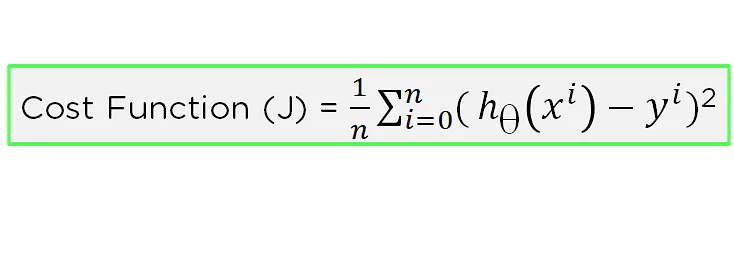
         
hΘ(x) = σ(Θ1+Θ2(x))


σ = sigmoid function


hΘ(x) = 1/1+e^-(Θ1+Θ2(x))

If we plot graph between j(Θ) and Θ then will get a non-convex function 

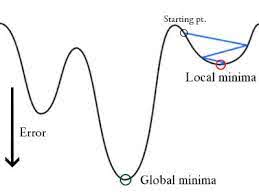

In-order to get it into a convex function we use logloss cost function in logistic regression

**Log loss Cost Function**:

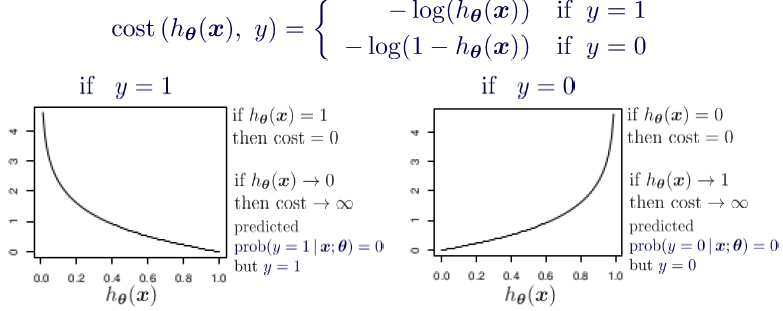

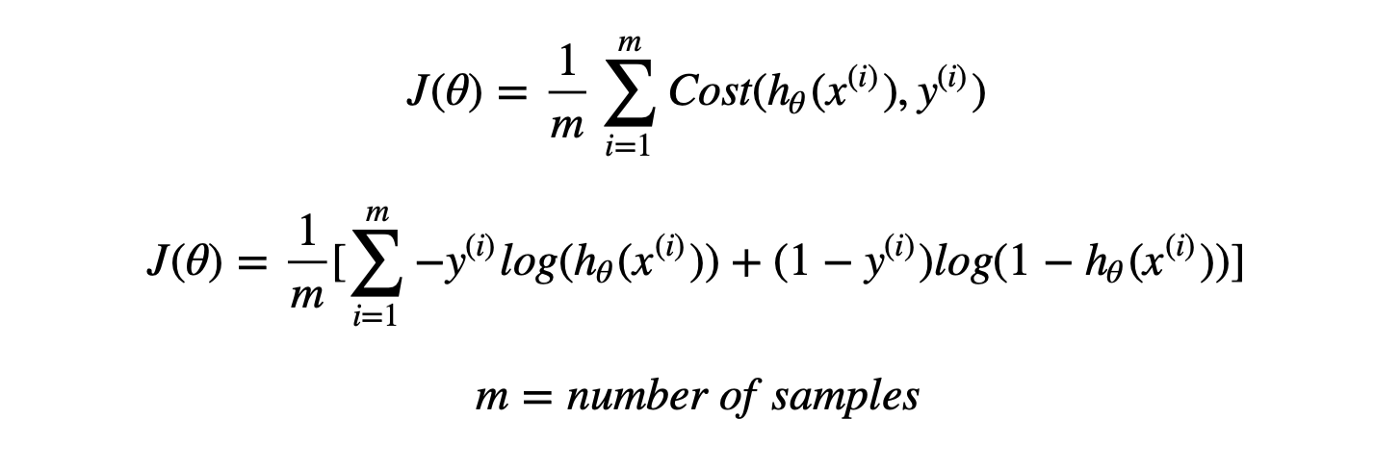

In this cost function we can never get stuck in the local minima
        

In [21]:
def cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

**Gradient Decent**:
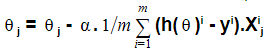



In [28]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = cost(X, y, params)

    return (cost_history, params)

In [29]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

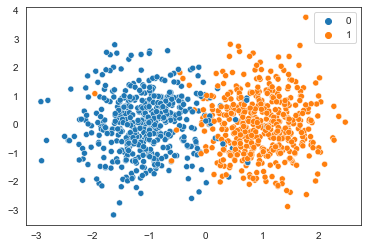

In [30]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1))

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[0.05113902]
 [3.42472509]
 [0.035455  ]] 



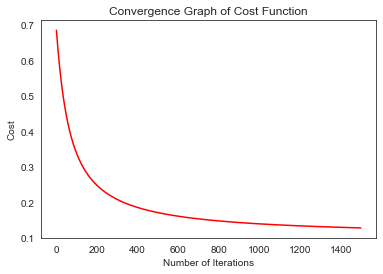

In [31]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [32]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.964


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


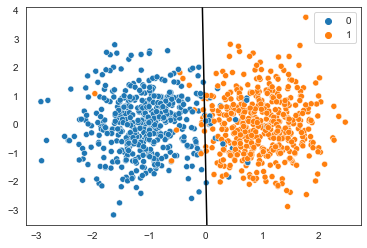

In [33]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");